### Here you can find the necessary import

In [1]:
import tensorflow as tf 
import os 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# you need the current working directory NB: works both windows and linux 
current_working_directory = os.getcwd()
current_working_directory = os.path.dirname(current_working_directory)

if not os.path.exists(f"{current_working_directory}/Datasets"):
    os.makedirs(f"{current_working_directory}/Datasets")

print(f"[DATASET] PUT THE DATASET here: {current_working_directory}/Datasets")


[DATASET] PUT THE DATASET here: c:\Users\legion\Documents\Studies/Datasets


In [3]:
# get the directory where I want to download the dataset
path_of_dataset = os.path.join(*['..', current_working_directory, 'Datasets', 'pizza_not_pizza'])
print(f"[DIR] The directory of the current dataset is {path_of_dataset}")

[DIR] The directory of the current dataset is c:\Users\legion\Documents\Studies\Datasets\pizza_not_pizza


### Data prep

In [4]:
# here let s do some functions that we can re-use also for other assignment
def load_the_data_and_the_labels(data_set_path: str, target_size: tuple or None = None):
    """
    This function help you to load the data dynamically 
    :param data_set_path: (str) put the path created in the previous cell (is the dataset path) 
    :param target_size: (tuple) the desired size of the images  
    :return: 
        - array of images 
        - array with labels 
        - list of labels name (this is used for better visualization)
    """
    try:
        dataset, labels, name_of_the_labels = list(), list(), list() 
        # let s loop here and we try to discover how many class we have 
        for class_number, class_name in enumerate(os.listdir(data_set_path)):
            full_path_the_data = os.path.join(*[data_set_path, class_name])
            print(f"[WALK] I am walking into {full_path_the_data}")
            
            # add the list to nam _list
            name_of_the_labels.append(class_name)
            
            for single_image in os.listdir(f"{full_path_the_data}"):
                full_path_to_image = os.path.join(*[full_path_the_data, single_image])
                
                # add the class number 
                labels.append(class_number)
                
                if target_size is None:
                    # let s load the image 
                    image = tf.keras.utils.load_img(full_path_to_image)
                else:
                    image = tf.keras.utils.load_img(full_path_to_image, target_size=target_size)
                
                # transform PIL object in image                    
                image = tf.keras.utils.img_to_array(image)
                
                # add the image to the ds list 
                dataset.append(image)
                
        return np.array(dataset, dtype='uint8'), np.array(labels, dtype='int'), name_of_the_labels
    except Exception as ex:
        print(f"[EXCEPTION] load the data and the labels throws exceptions {ex}")

#### Load the data 

In [5]:
# load the data 
data, labels, classes = load_the_data_and_the_labels(data_set_path=path_of_dataset, target_size=(224, 224, 3))

[WALK] I am walking into c:\Users\legion\Documents\Studies\Datasets\pizza_not_pizza\not_pizza
[WALK] I am walking into c:\Users\legion\Documents\Studies\Datasets\pizza_not_pizza\pizza


#### Normalize the data 

In [6]:
# normalize the data 
# we can rescale the pixel values between [0, 1]
data = data / 255.0

#### Split the data use the train_test_split function 

In [7]:
# split the data in train and test sets 
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)


### Create the CNN according the instruction:
        a. Input layer
        b. Data augmentation, with random flip (horizontal and vertical) and random rotation (0.2).
        c. Two hidden layers each composed with the following characteristics: 16 conv2d units, max pooling 2d and batch normalization, the second one should have 24 conv2d units max pooling 2d and batch normalization. 
        d. After this, add a flatten layer and a dense layer with 8 units
        e. Add the final classifier (a  dense layer) with the correct number of output and activation
        
![alt text](assignment_1_two_layers_CNN.png "CNN with two layers")

In [8]:
# create the cnn
datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
)
model = Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(24, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

### compile the model 
Compile the model with Adam optimizer and binary cross entropy as loss function. 

In [9]:
# compile the CNN 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 16)      64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 24)      3480      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 24)        0         
 g2D)                                                            
                                                       

### Train the model with 128 epochs and 64 batch size 

In [10]:
# do it here
model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=128, validation_data=(X_test, y_test))

Epoch 1/128


22/22 [==============================] - 14s 581ms/step - loss: 1.5093 - accuracy: 0.5778 - val_loss: 0.7286 - val_accuracy: 0.4797
Epoch 2/128
22/22 [==============================] - 12s 562ms/step - loss: 1.0419 - accuracy: 0.5596 - val_loss: 0.6998 - val_accuracy: 0.5000
Epoch 3/128
22/22 [==============================] - 12s 532ms/step - loss: 0.8339 - accuracy: 0.6955 - val_loss: 0.7629 - val_accuracy: 0.4797
Epoch 4/128
22/22 [==============================] - 12s 525ms/step - loss: 0.6995 - accuracy: 0.7115 - val_loss: 0.7273 - val_accuracy: 0.5051
Epoch 5/128
22/22 [==============================] - 12s 533ms/step - loss: 0.6493 - accuracy: 0.7115 - val_loss: 0.7120 - val_accuracy: 0.5034
Epoch 6/128
22/22 [==============================] - 12s 531ms/step - loss: 0.6097 - accuracy: 0.7398 - val_loss: 0.6865 - val_accuracy: 0.5356
Epoch 7/128
22/22 [==============================] - 12s 526ms/step - loss: 0.6432 - accuracy: 0.7449 - val_loss: 0.6988 - val_accurac

### Evaluate the model and report the accuracy 

In [24]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


19/19 [==============================] - 1s 29ms/step - loss: 1.1825 - accuracy: 0.7492
Test Loss: 1.182513952255249
Test Accuracy: 0.7491525411605835


### Make prediction with the test set and use a threshold of 0.5 as boundaries decision between the classes. 

In [12]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test)

# Apply threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Display the predictions
print("Predicted probabilities:", y_pred_prob[:5])
print("Predicted classes:", y_pred[:5])


19/19 [==============================] - 1s 30ms/step
Predicted probabilities: [[4.7591398e-03]
 [3.9742354e-01]
 [6.8499907e-07]
 [4.8387170e-02]
 [9.9999517e-01]]
Predicted classes: [[0]
 [0]
 [0]
 [0]
 [1]]


### show predictions

In [13]:
def show_some_prediction(number_of_subplot, test_set, predictions, name_of_the_labels):
    for i in range(number_of_subplot):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(test_set[i])
        plt.title(f'{name_of_the_labels[predictions[i]]}')
        plt.axis("off")
    plt.show()

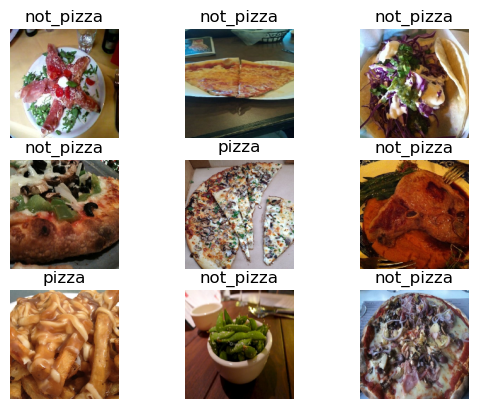

In [14]:
show_some_prediction(9, X_test, y_pred.flatten(), classes)

### show metrics like confusion matrix or ROC curve or both (sklearn has already implemented all these stuff)

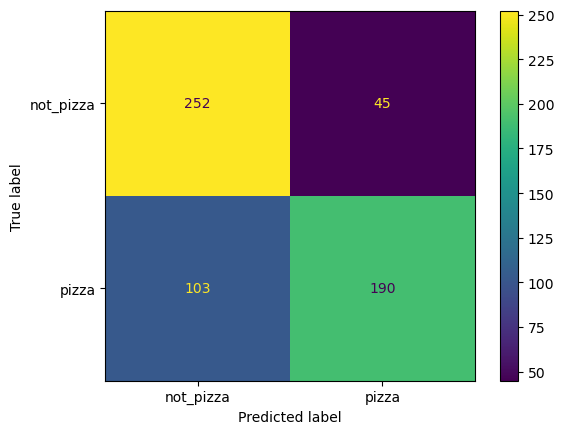

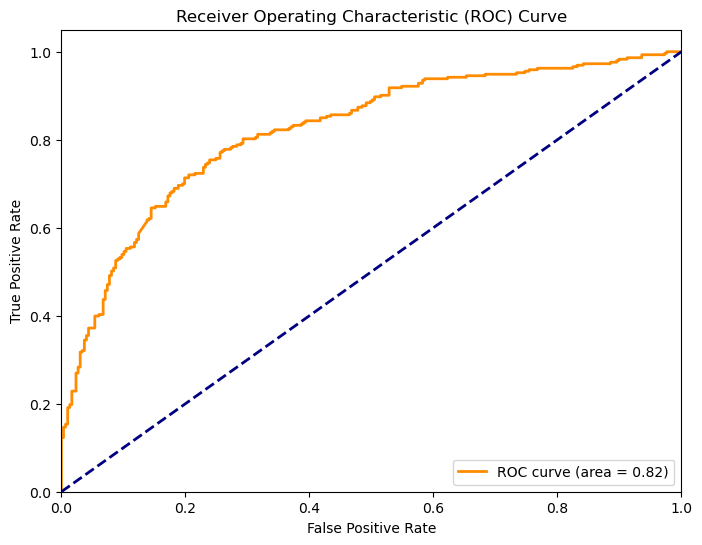

In [15]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Build another base CNN, but at point c add an extra hidden layer with 32 units of conv2d.  Repeat all the other steps. What happened to the accuracy of the model? Why?  

![alt text](assignment_1_three_layers_CNN.png "CNN with three layers")

In [17]:
# alternate model version
model_alternate = Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(24, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# compile the new model
model_alternate.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_alternate.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 batch_normalization_5 (Bat  (None, 111, 111, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 24)      3480      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 24)        0         
 g2D)                                                            
                                                      

In [18]:
model_alternate.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=128, validation_data=(X_test, y_test))

Epoch 1/128
22/22 [==============================] - 14s 602ms/step - loss: 0.9303 - accuracy: 0.6468 - val_loss: 0.7606 - val_accuracy: 0.5051
Epoch 2/128
22/22 [==============================] - 12s 551ms/step - loss: 0.6902 - accuracy: 0.6664 - val_loss: 0.6788 - val_accuracy: 0.5593
Epoch 3/128
22/22 [==============================] - 13s 600ms/step - loss: 0.6079 - accuracy: 0.7195 - val_loss: 0.6623 - val_accuracy: 0.5966
Epoch 4/128
22/22 [==============================] - 12s 546ms/step - loss: 0.5455 - accuracy: 0.7544 - val_loss: 0.6490 - val_accuracy: 0.6254
Epoch 5/128
22/22 [==============================] - 12s 543ms/step - loss: 0.4909 - accuracy: 0.7762 - val_loss: 0.6417 - val_accuracy: 0.6424
Epoch 6/128
22/22 [==============================] - 12s 547ms/step - loss: 0.4784 - accuracy: 0.7922 - val_loss: 0.6006 - val_accuracy: 0.6559
Epoch 7/128
22/22 [==============================] - 12s 546ms/step - loss: 0.4835 - accuracy: 0.7892 - val_loss: 0.6418 - val_accuracy:

In [25]:
# Evaluate the newly trained model on the test set and compare accuracy
test_loss_alternate, test_accuracy_alternate = model_alternate.evaluate(X_test, y_test)

print("Prev Test Loss:", test_loss)
print("Prev Test Accuracy:", test_accuracy)

print("New Test Loss:", test_loss_alternate)
print("New Test Accuracy:", test_accuracy_alternate)


19/19 [==============================] - 1s 32ms/step - loss: 0.9086 - accuracy: 0.8220
Prev Test Loss: 1.182513952255249
Prev Test Accuracy: 0.7491525411605835
New Test Loss: 0.9086310863494873
New Test Accuracy: 0.8220338821411133


It seems that the accuracy of the model has increased and its loss decreased by the introduction of an extra hidden layer. The additional layer increased the model's ability to learn more complex features and patterns from the data.